### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [293]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
# Numerical libraries
import numpy as np   
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
# to handle data in form of rows and columns 
import pandas as pd    
# importing ploting libraries
import matplotlib.pyplot as plt   
from sklearn import metrics
from scipy.stats import zscore 
#from google.colab import files

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [201]:
data = pd.read_csv('vehicle.csv')
data.dropna(axis=0,inplace=True) 
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

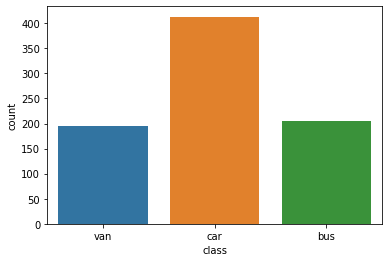

In [202]:
sns.countplot(x="class", data=data)

### Check for any missing values in the data 

In [203]:
data.info()
#No Missing values in data



<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [204]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature]).codes # Replace strings with an integer

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [205]:
# standardizing the data
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
data_scaled = data.apply(zscore)

# statistics of scaled data
#pd.DataFrame(data_scaled).describe()

### K - Means Clustering

### Assign a dummy array called Cluster_error

In [206]:
# KMeans Clustring Algorithm
# Label, Intertia and Centroid
cluster_range = range(1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, init='k-means++')
  clusters.fit(data_scaled)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
 

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [207]:
 # combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,15447.000000
1,2,9415.219195
2,3,7833.371766
3,4,6528.953980
4,5,5882.028143
5,6,5434.938306
6,7,4953.789701
7,8,4514.057300
8,9,4216.875503


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

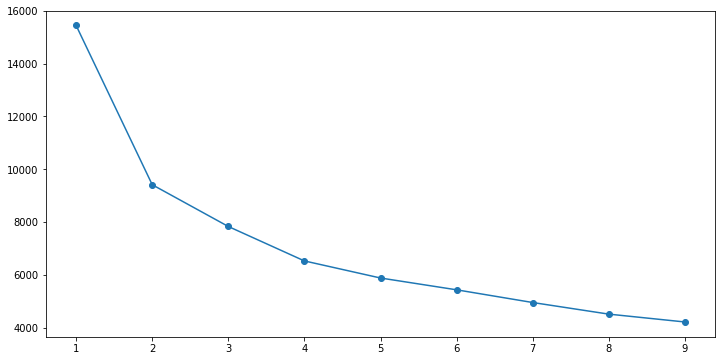

In [208]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

In [209]:
#Optimal value is 2 as per the plot above

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [210]:
cluster = KMeans( n_clusters = 2, init='k-means++' )
cluster.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [211]:
# Get the centroids.... using function cluster_centers_
centroids = cluster.cluster_centers_
centroids

array([[-0.56180643, -0.58110816, -0.60387639, -0.5326733 , -0.12159511,
        -0.16400847, -0.63711793,  0.60754663, -0.63896831, -0.5379239 ,
        -0.61246602, -0.63980526, -0.53356985,  0.04202611, -0.07458642,
        -0.13153147, -0.03702134, -0.1233491 ,  0.11689336],
       [ 1.05786955,  1.0942143 ,  1.13708639,  1.00301249,  0.228961  ,
         0.30882445,  1.19967951, -1.14399738,  1.20316373,  1.01289926,
         1.15326048,  1.20473969,  1.00470068, -0.07913426,  0.14044464,
         0.24767096,  0.0697104 ,  0.23226373, -0.2201077 ]])

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [212]:
# Let us put the raw centroid values into a dataframe under respective columns
centroid_df = pd.DataFrame(centroids, columns = list(data.columns) )
centroid_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,-0.561806,-0.581108,-0.603876,-0.532673,-0.121595,-0.164008,-0.637118,0.607547,-0.638968,-0.537924,-0.612466,-0.639805,-0.533570,0.042026,-0.074586,-0.131531,-0.037021,-0.123349,0.116893
1,1.057870,1.094214,1.137086,1.003012,0.228961,0.308824,1.199680,-1.143997,1.203164,1.012899,1.153260,1.204740,1.004701,-0.079134,0.140445,0.247671,0.069710,0.232264,-0.220108


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [213]:
print(kmeans.labels_)

[1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0
 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1
 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1
 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1
 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1
 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0
 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0
 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1
 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1
 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1
 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0
 1 1 1 1 0 1 1 1 1 1 0 1 

In [216]:
data_scaled["group"] = labels
data_scaled.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class,group
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837,1.443415,5
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318,1.443415,5
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596,0.017538,4
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243,1.443415,3
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531,-1.408339,8
6,0.406283,-0.293543,-0.573312,0.116137,0.404751,-0.556023,-0.470734,0.129648,-0.606014,-0.337462,-0.397397,-0.441776,-0.069700,-0.856567,1.351690,-1.310052,1.792048,1.118521,-1.408339,1
7,-0.444400,-0.293543,-1.017098,-0.360128,0.404751,0.085785,-0.954676,0.899019,-0.994877,-0.130505,-0.846883,-0.898494,-0.317284,-0.722724,-0.681472,-1.085874,0.653818,0.848040,1.443415,3
8,-0.930504,-1.758654,-1.270690,-0.866160,-0.097251,-0.342087,-1.408372,1.668390,-1.383740,-1.441236,-1.521112,-1.229615,-1.926579,-1.124255,-0.884788,0.147109,1.792048,1.659484,1.443415,3
10,-0.930504,-1.433074,-0.763506,-0.776860,-0.097251,0.085785,-1.075662,1.155476,-0.994877,-1.234278,-1.135838,-0.984129,-1.462359,-0.856567,-0.884788,-0.301249,0.816422,0.848040,1.443415,3
11,-0.444400,-1.758654,-1.017098,-0.985226,-0.850254,-0.556023,-1.378125,1.668390,-1.383740,-2.062109,-1.296369,-1.223906,-1.740891,-0.990411,-0.274839,1.492180,1.141631,0.848040,0.017538,3


## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [246]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [285]:
#df = pd.DataFrame({'A': [a], 'B': [b], 'C':[c] },index=[0, 1, 2,])
abc = np.concatenate((a, b, c), axis=0)
df = pd.DataFrame(abc, columns=['x', 'y'])


In [286]:
df.head()

,x,y
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773


### 10. Use scatter matrix to print all the 3 distributions

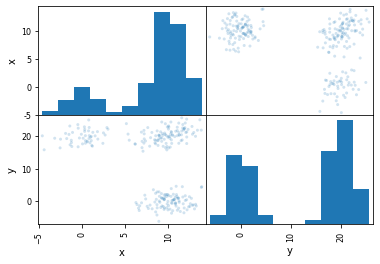

In [287]:
from pandas.plotting import scatter_matrix

axs = scatter_matrix(df, alpha=0.2, diagonal='hist')


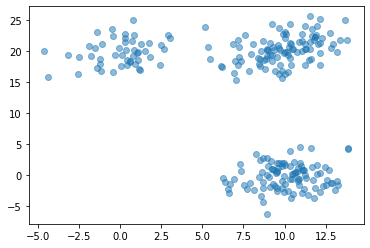

In [291]:
plt.scatter(df['x'], df['y'], alpha=0.5)


### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [295]:
# Case 1: Ward Method
Z = linkage(df, 'ward')
c, coph_dists = cophenet(Z , pdist(df))
print("Ward",c)
# Case 2: Average Linkage
Z = linkage(df, 'average')
c, coph_dists = cophenet(Z , pdist(df))
print("Average", c)
# Case 3: Complete Linkage
Z = linkage(df, 'complete')
c, coph_dists = cophenet(Z , pdist(df))
print("Complete",c)

#pist - Distance within clusters
#cdist - Distance between clusters

Ward 0.9536963071171022
Average 0.9570116112695627
Complete 0.9448184225329517


In [297]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

### 12. Plot the dendrogram for the consolidated dataframe

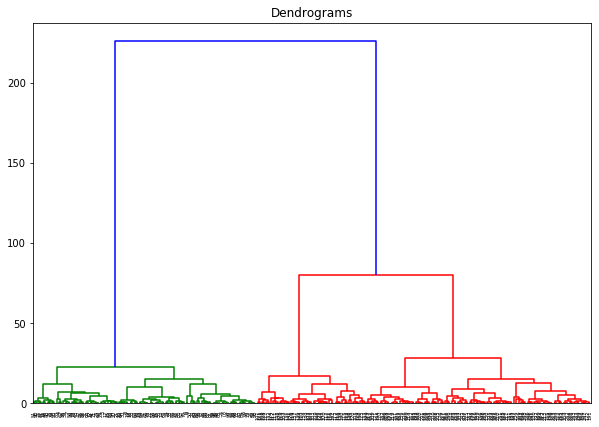

In [309]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

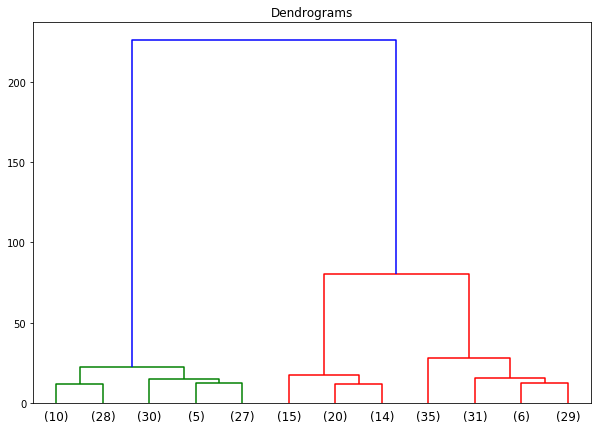

In [311]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'),p=12, truncate_mode='lastp')


### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [ ]:
#optional as per instructions given

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [ ]:
#optional as per instructions given

In [ ]:
#optional as per instructions given

### Use matplotlib to visually observe the clusters in 2D space 

In [ ]:
#optional as per instructions given